## 주택매매가격 사이트 크롤링 절차

$1.$ **selinium - driver.get 을 통해 한국은행경제통계시스템 접속**

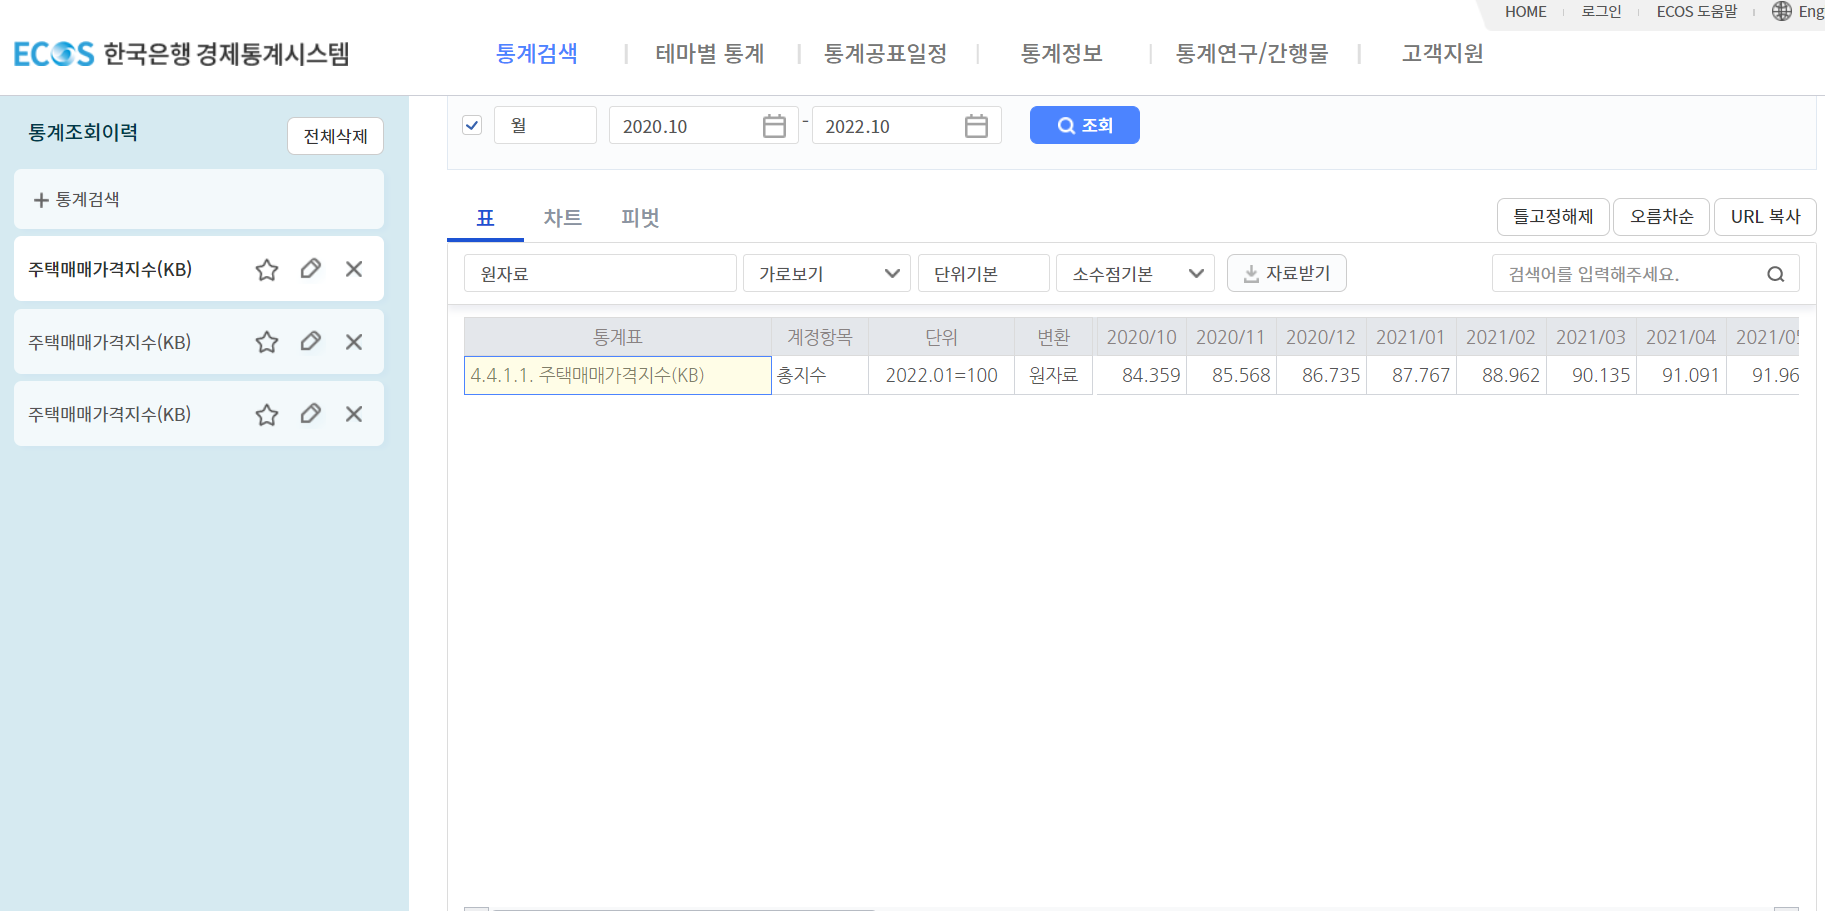

$2.$ **필요한 데이터 가져오기** : 2000.01. 부터 2022.10.까지 설정 후 url 가져오기
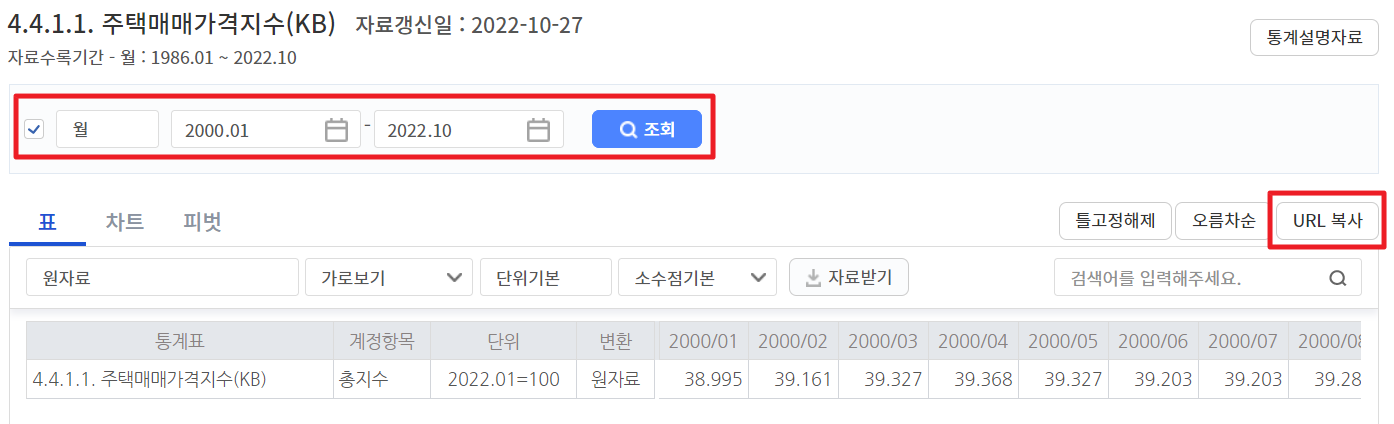

In [1]:
# 크롤링 작업을 위한 라이브러리 임포트
from bs4 import BeautifulSoup   # 정제
from selenium import webdriver  # 데이터 소스 불러오기
import requests #requests 라이브러리로 원격 API 호출하기
import time             #코드 진행 지연을 위한 time 임포트


from selenium.webdriver.common.by import By
import codecs

In [56]:
driver = webdriver.Chrome()
time.sleep(1)
driver.get("https://ecos.bok.or.kr/#/Short/22a8df") #한국은행경제통계시스템 사이트 url 접속
time.sleep(2)

$3.$ **파싱된 데이터 확인 후 XPATH로 원하는 데이터 불러옴** <br>

- 코드 6번 줄 <br>
날짜 XPATH : rg-header-renderer → rgheader 변수에 저장<br>
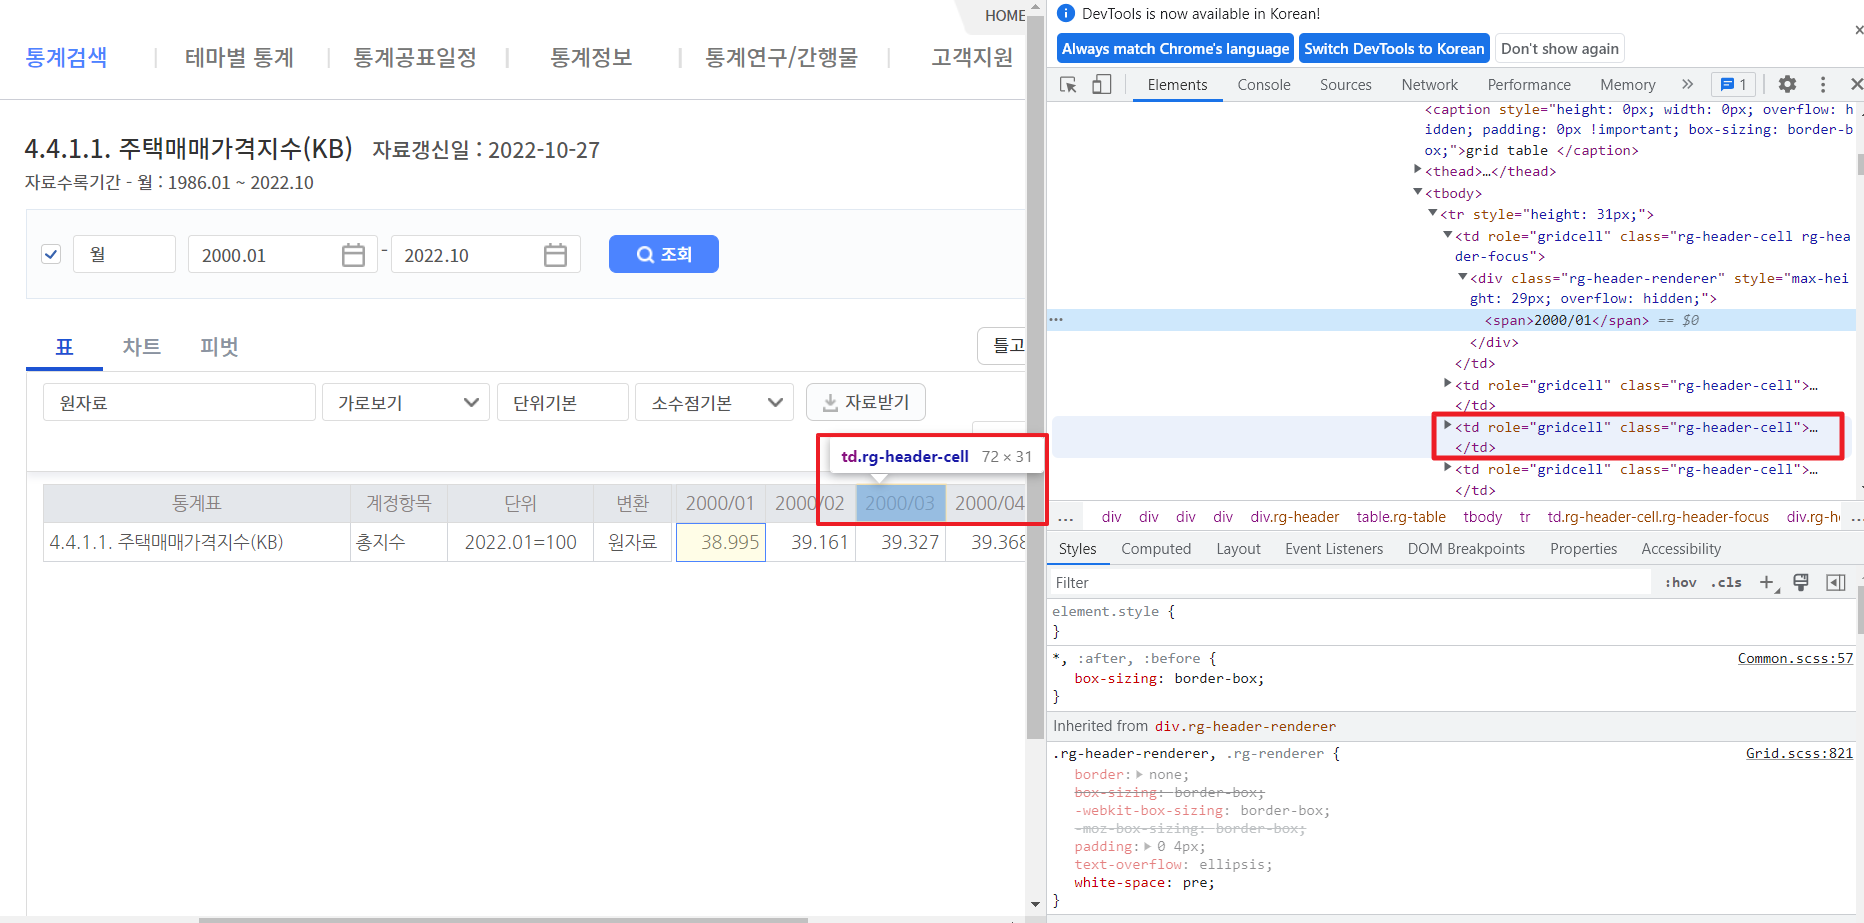<br>

- 코드 15번 줄 <br>
주택매매가격 지수 XPATH : rg-renderer → rglist 변수에 저장
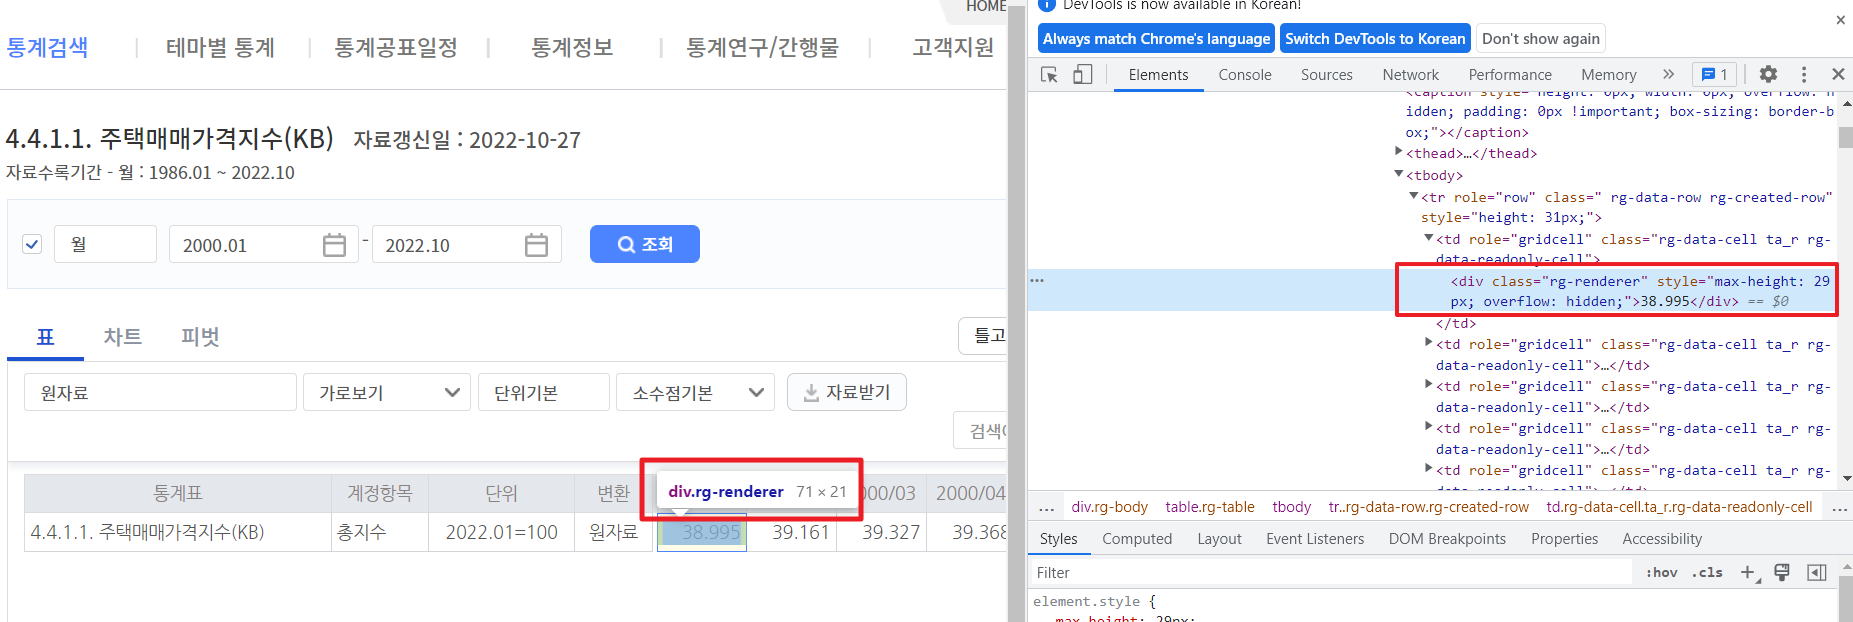

$4.$ **반복문을 통해 데이터를 리스트 안에 저장**<br> 
- 코드 1번줄 : result_dict = {} date_listd와 value_list를 딕셔너리로 받아오기 위해 빈 딕셔너리를 만들어줌<br>
- 코드 8번줄 : date_list = list() rgheader를 받아올 빈 리스트 만들어줌<br>
- 코드 17번줄 : value_list = list() rglist를 받아올 빈 리스트를 만들어줌

In [81]:
result_dict = {}  # [date_list[i]] = value_list[i] 
source = driver.page_source
parsed_source = BeautifulSoup(source, "html.parser")

#날짜 데이터
rgheader = parsed_source.find_all("div", class_="rg-header-renderer")

date_list = list() # date_list :날짜 데이터 리스트

for i in range(262):            # 2000년 1월 부터 2022년 10월까지의 지수 데이터가 총 262개 임을 확인 후 range(262)로 설정
    date_list.append(rgheader[i].text.replace('/','')) # .replace('/','') 를 통해 기존 날짜 형식 2000/01을 200001로 변경하여 date_list로 i번 동안 반복하여 추가


#주택매매가격지수 데이터
rglist = parsed_source.find_all("div", class_="rg-renderer")

value_list = list() # value_list: 주택매매가격지수 리스트

for i in range(262):         # 2000년 1월 부터 2022년 10월까지의 지수 데이터가 총 262개 임을 확인 후 range(262)로 설정
    value_list.append(rglist[i].text) # date_list로 i번 = (262) 동안 반복하여 append로 value_list에 추가
    result_dict[date_list[i]] = value_list[i] # date_list로 i번 = (262) 동안 반복하여 append로 value_list에 추가


tmp_dict = result_dict.copy()  # tmp_dict라는 임시 딕셔너리를 만들어줌

In [22]:
parsed_source  #파싱된 데이터 확인

<html lang="ko"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0" name="viewport"/><link href="/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/><link href="/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/><link href="/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/><link href="/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/><link href="/android-icon-192x192.png" rel="icon" sizes="192x192" type="image/png"/><link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favico

In [73]:
tmp_dict

{'200001': '38.995',
 '200002': '39.161',
 '200003': '39.327',
 '200004': '39.368',
 '200005': '39.327',
 '200006': '39.203',
 '200007': '39.203',
 '200008': '39.285',
 '200009': '39.368',
 '200010': '39.410',
 '200011': '39.285',
 '200012': '39.037',
 '200101': '38.995',
 '200102': '39.120',
 '200103': '39.368',
 '200104': '39.617',
 '200105': '39.907',
 '200106': '40.239',
 '200107': '40.736',
 '200108': '41.523',
 '200109': '42.186',
 '200110': '42.393',
 '200111': '42.559',
 '200112': '42.891',
 '200201': '44.010',
 '200202': '45.129',
 '200203': '46.165',
 '200204': '46.620',
 '200205': '46.910',
 '200206': '47.118',
 '200207': '47.574',
 '200208': '48.402',
 '200209': '49.563',
 '200210': '49.811',
 '200211': '49.853',
 '200212': '49.936',
 '200301': '49.894',
 '200302': '50.143',
 '200303': '50.516',
 '200304': '50.972',
 '200305': '51.800',
 '200306': '52.173',
 '200307': '52.289',
 '200308': '52.462',
 '200309': '52.904',
 '200310': '53.432',
 '200311': '53.241',
 '200312': '5

$5.$ **데이터프레임 생성 후 CSV 파일로 저장** 

In [48]:
import pandas as pd # 데이터프레임을 만들기위해 pandas 불러오기

In [82]:
datas = pd.DataFrame(index=tmp_dict.keys(),data=tmp_dict.values()) # tmp_dict를 데이터 프레임화하여 datas에 저장

In [76]:
datas

0
200001  38.995
200002  39.161
200003  39.327
200004  39.368
200005  39.327
...        ...
202106  93.169
202107  94.256
202108  95.666
202109  97.123
202110  98.140

[262 rows x 1 columns]

In [87]:
datas.to_csv("price.csv") # datas를 csv로 저장

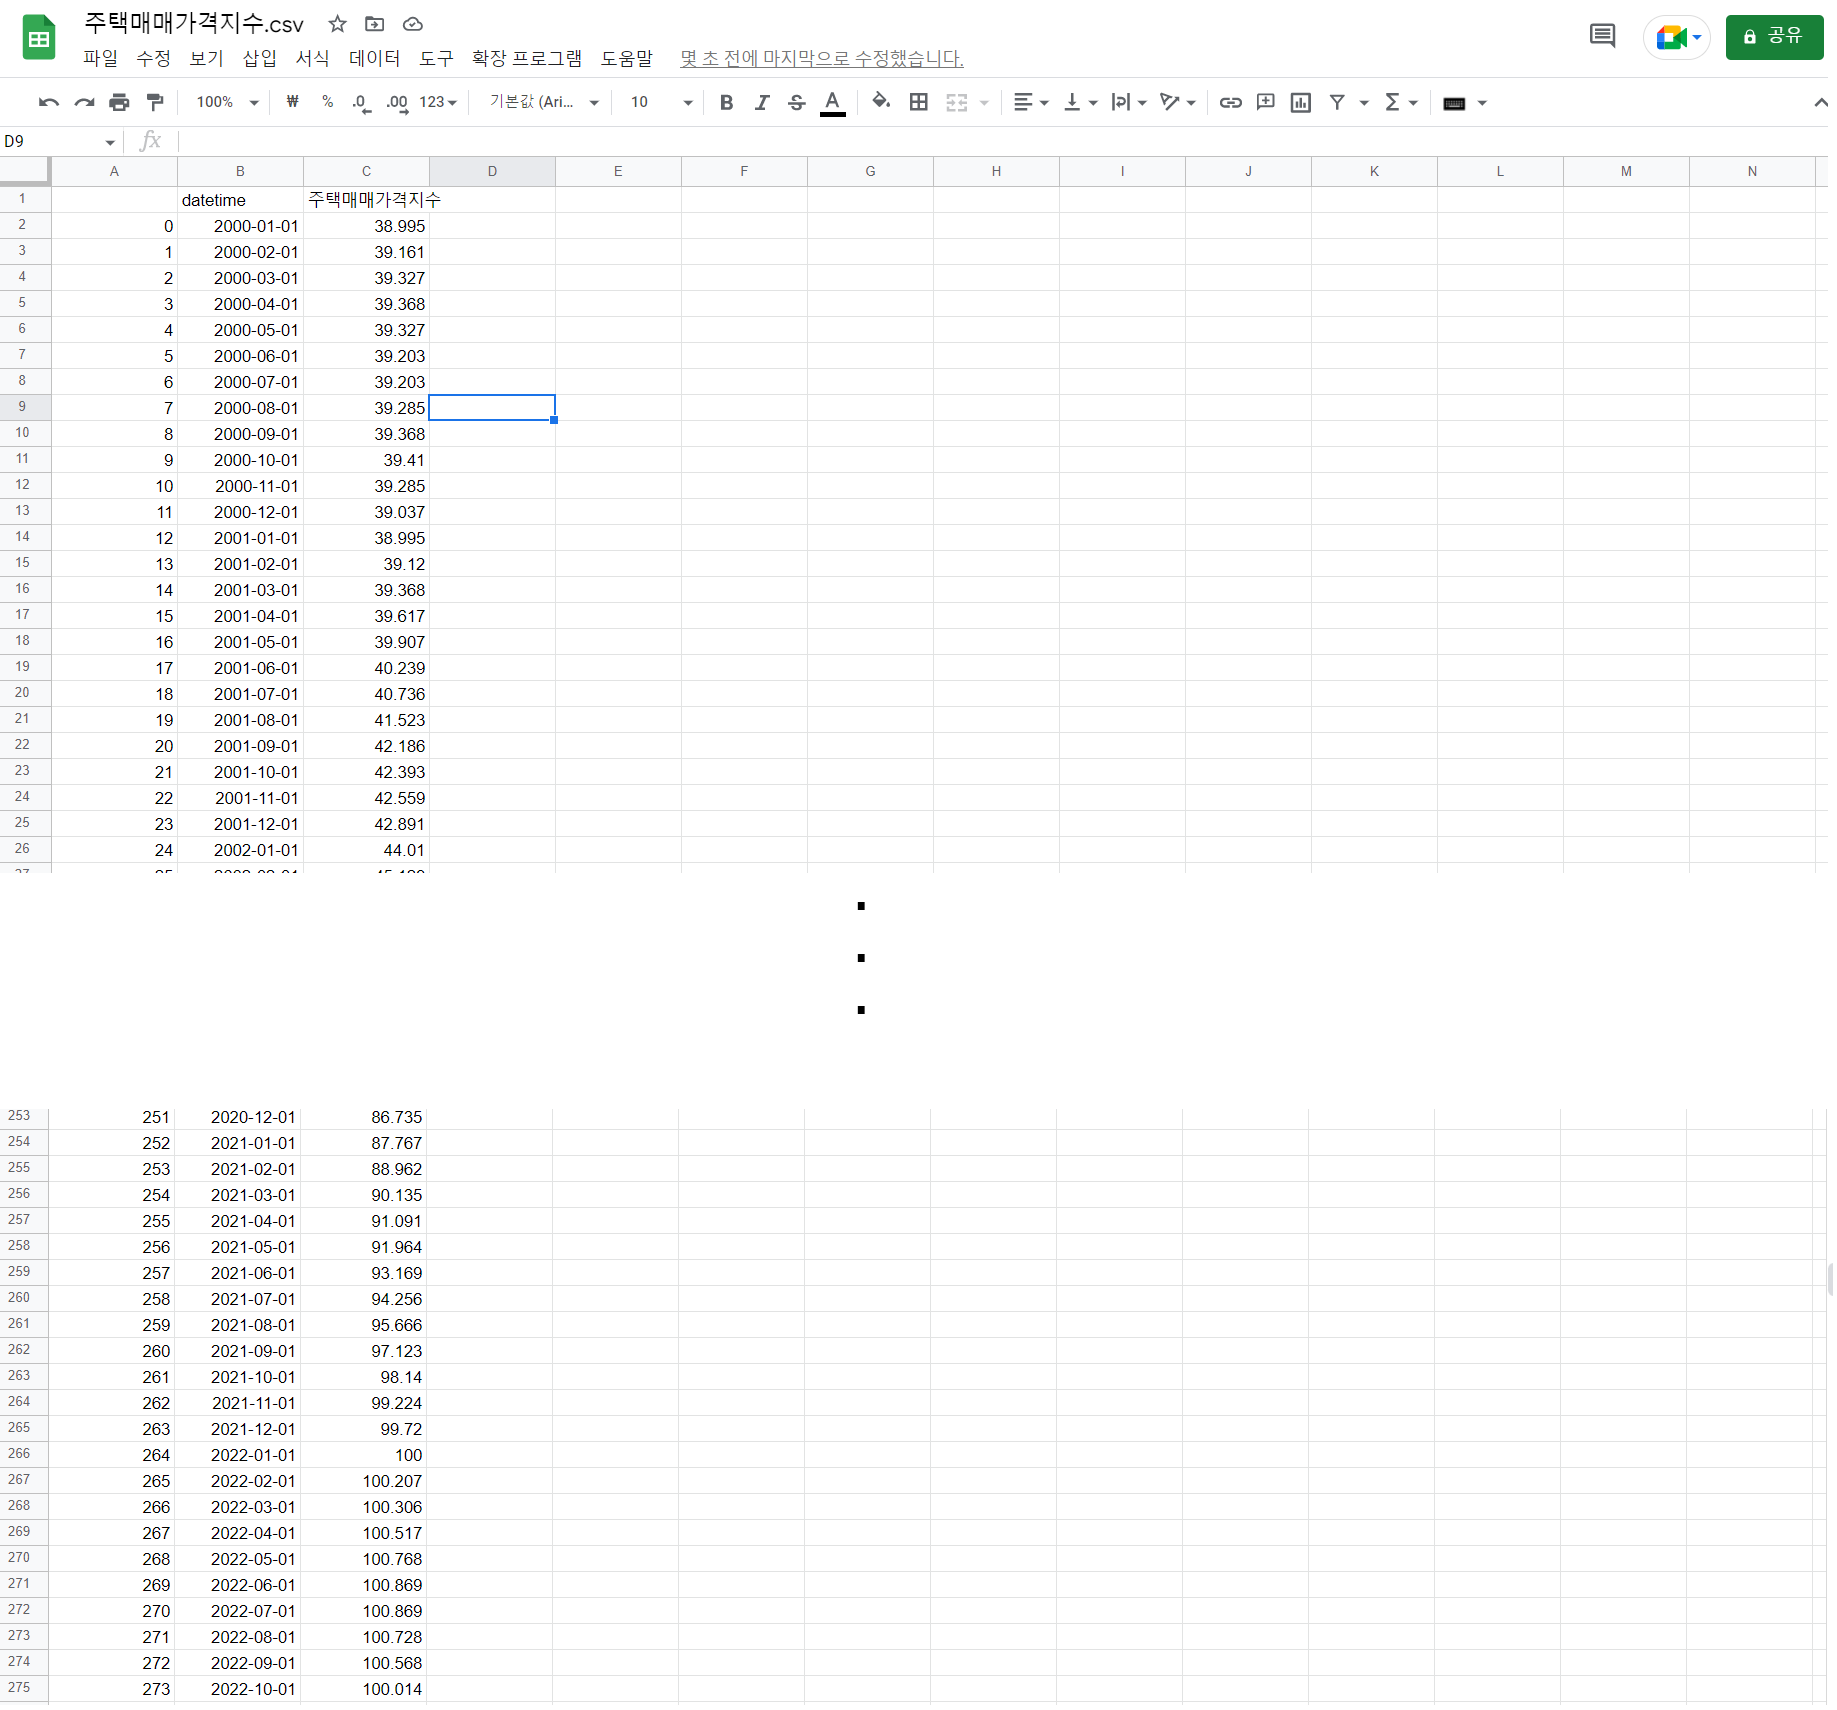